# The Sequential model

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

When to use a Sequential model
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor

In [ ]:
#https://keras.io/api/layers/core_layers/dense/

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

In [3]:
print(y)

tf.Tensor(
[[-0.21506688  0.14551742  0.15673359 -0.21258062]
 [-0.21506688  0.14551742  0.15673359 -0.21258062]
 [-0.21506688  0.14551742  0.15673359 -0.21258062]], shape=(3, 4), dtype=float32)


In [4]:
model.weights


[<tf.Variable 'layer1/kernel:0' shape=(3, 2) dtype=float32, numpy=
 array([[ 1.0173733 , -0.74105096],
        [-1.0029489 ,  0.6300249 ],
        [ 0.32601023, -0.94073844]], dtype=float32)>,
 <tf.Variable 'layer1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'layer2/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.5588285 ,  0.29839075,  0.89735734],
        [ 0.7066339 , -0.51766217,  0.26452243]], dtype=float32)>,
 <tf.Variable 'layer2/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'layer3/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[-0.40021646,  0.14421487, -0.45672756,  0.6991819 ],
        [ 0.55656874,  0.844296  ,  0.5173787 , -0.80526096],
        [-0.88907385,  0.19559193,  0.34101415, -0.42809743]],
       dtype=float32)>,
 <tf.Variable 'layer3/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [5]:
# Call layer on a test input
x = tf.ones((1, 4))
layer = layers.Dense(3)
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)


[<tf.Variable 'dense/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[-0.42217273,  0.5967754 ,  0.8533796 ],
        [-0.6006402 ,  0.8777803 , -0.6231463 ],
        [-0.68537664, -0.5688075 , -0.36101013],
        [ 0.7873744 , -0.15515172,  0.7169322 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

When you instantiate a Sequential model without an input shape, it isn't "built": it has no weights (and calling model.weights results in an error stating just this). The weights are created when the model first sees some input data:

In [6]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
#model.weights

# You also can't do this:
#model.summary()

# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Weights:",model.weights)  # 6
print("Number of weights after calling the model:", len(model.weights))  # 6

Weights: [<tf.Variable 'dense_1/kernel:0' shape=(4, 2) dtype=float32, numpy=
array([[-0.08046031, -0.97433805],
       [ 0.5333359 ,  0.850209  ],
       [-0.7719879 , -0.11262631],
       [ 0.9330945 , -0.4405706 ]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>, <tf.Variable 'dense_2/kernel:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.4945308 ,  0.834396  , -0.9766254 ],
       [-0.39334834, -0.7330924 ,  0.899838  ]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>, <tf.Variable 'dense_3/kernel:0' shape=(3, 4) dtype=float32, numpy=
array([[-0.23188257, -0.71365666,  0.63567054,  0.03570062],
       [ 0.7690681 , -0.4807245 ,  0.7846682 ,  0.5805452 ],
       [ 0.30849624,  0.61881065, -0.1290834 ,  0.25857067]],
      dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]
Number of wei

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (1, 2)                    10        
                                                                 
 dense_2 (Dense)             (1, 3)                    9         
                                                                 
 dense_3 (Dense)             (1, 4)                    16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [8]:
#!pip install pydot
#!pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [9]:
#https://gitlab.com/graphviz/graphviz/-/releases

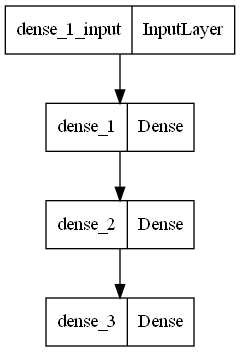

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, "my_first_model.png")

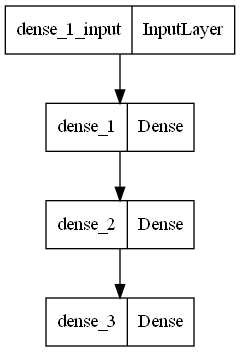

In [11]:
keras.utils.plot_model(model, "my_first_model.png")

In [12]:
model.add(layers.Dense(2, activation="relu"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (1, 2)                    10        
                                                                 
 dense_2 (Dense)             (1, 3)                    9         
                                                                 
 dense_3 (Dense)             (1, 4)                    16        
                                                                 
 dense_4 (Dense)             (1, 2)                    10        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.pop()

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (1, 2)                    10        
                                                                 
 dense_2 (Dense)             (1, 3)                    9         
                                                                 
 dense_3 (Dense)             (1, 4)                    16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Sequential API (Very convenient, not very flexible)

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

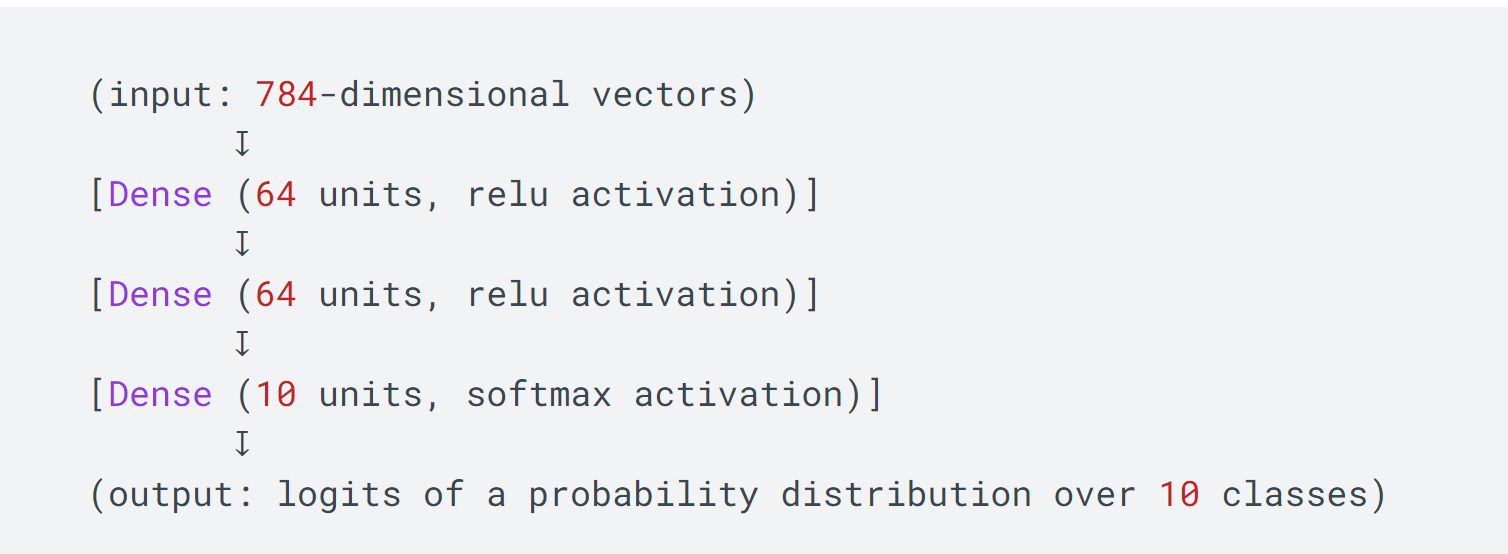

This is a basic graph with three layers. To build this model using the functional API, start by creating an input node:

In [16]:
inputs = keras.Input(shape=(784,))

The shape of the data is set as a 784-dimensional vector. The batch size is always omitted since only the shape of each sample is specified.

If, for example, you have an image input with a shape of (32, 32, 3), you would use:

In [17]:
img_inputs = keras.Input(shape=(32, 32, 3))

In [18]:
inputs.shape

TensorShape([None, 784])

In [19]:
inputs.dtype

tf.float32

You create a new node in the graph of layers by calling a layer on this inputs object:

In [20]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

The "layer call" action is like drawing an arrow from "inputs" to this layer you created. You're "passing" the inputs to the dense layer, and you get x as the output.

Let's add a few more layers to the graph of layers

In [21]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

At this point, you can create a Model by specifying its inputs and outputs in the graph of layers:

In [22]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [23]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


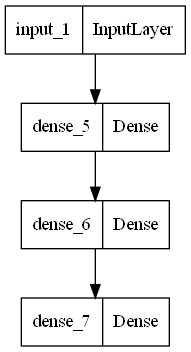

In [24]:
keras.utils.plot_model(model, "my_first_NN.png")